# Einleitung
## Bewegungsvorhersage von Verkehrsteilnehmern
Der Datensatz von Waymo umfasst Positions und Geschwindigkeitsinformationen für Autofahrer, Fahrradfahrer und Fußgänger in 1000 verschiedenen Verkerszenarien. Zu jedem dieser Szenarien ist zudem eine Karte verfügbar. Dies führt zu einer Datenmenge von 620,3 GB Trainingsdaten und 56,3 GB Validierungsdaten.

## Statische Rasterisierung
Diese werden füre ein bildbasierte Weiterverarbeitung in eine 128x128 Pixel große Repräsentation aus Vogelperspektive übertragen.

In [13]:
import os
from os import walk
import numpy as np
import imageio

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

GRID_SIZE = 128
DATA_LENGTH = 90


PATHNAME = '/media/dev/data/waymo_motion/validation'

In [23]:
scenario_name = 'tfrecord-00002-of-00150'

In [ ]:
scenario_name = 'tfrecord-00038-of-00150'

In [24]:
def last_int(x):
    y = x.split("00150_")
    z = y[1].split(".")
    return(int(z[0]))

def load_scenario(n_frames=10):
    """
    load scenarios that were saved using convert_training_data.py
    """
    frames = np.zeros((1, n_frames, GRID_SIZE, GRID_SIZE, 1), dtype=np.float32)

    _, _, filenames = next(walk(PATHNAME + '/static_' + scenario_name))
    temp_frames = np.zeros((DATA_LENGTH, GRID_SIZE, GRID_SIZE, 1), dtype=np.float32)
    
    for filename in sorted(filenames, key = last_int)  :
        image = imageio.imread(PATHNAME + '/static_' + scenario_name + '/' + filename, as_gray=True)
        image = np.reshape(image, (GRID_SIZE,GRID_SIZE,1))
        filename_sections = filename.split('_')
        filename_index, _ = filename_sections[-1].split('.')
        temp_frames[int(filename_index)] = image/255
    
    frames[0] = temp_frames[0:n_frames]

    return frames

Loading Frame: 90/90
Assembling Animation


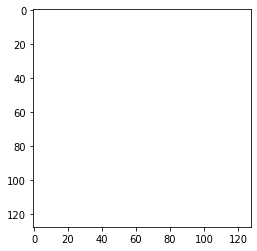

In [25]:
input_frames = load_scenario(DATA_LENGTH)

# https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot
plt.rcParams["animation.html"] = "jshtml"
fig = plt.figure()

ims = []
for i in range(1, 90):
    im = plt.imshow(input_frames[0][i], animated=True)
    ims.append([im])
    sys.stdout.write("\rLoading Frame: " + str(i+1) + "/90")
    sys.stdout.flush()
print("\nAssembling Animation")
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
ani

## Dynamische Rasterisierung

In [21]:
def last_int(x):
    y = x.split("00150_")
    z = y[1].split(".")
    return(int(z[0]))

def load_scenario(n_frames=10):
    """
    load scenarios that were saved using convert_training_data.py
    """
    frames = np.zeros((1, n_frames, GRID_SIZE, GRID_SIZE, 1), dtype=np.float32)

    _, _, filenames = next(walk(PATHNAME + '/'+ scenario_name))
    temp_frames = np.zeros((DATA_LENGTH, GRID_SIZE, GRID_SIZE, 1), dtype=np.float32)
    
    for filename in sorted(filenames, key = last_int)  :
        image = imageio.imread(PATHNAME + '/' + scenario_name + '/' + filename, as_gray=True)
        image = np.reshape(image, (GRID_SIZE,GRID_SIZE,1))
        filename_sections = filename.split('_')
        filename_index, _ = filename_sections[-1].split('.')
        temp_frames[int(filename_index)] = image/255
    
    frames[0] = temp_frames[0:n_frames]

    return frames

Loading Frame: 90/90
Assembling Animation


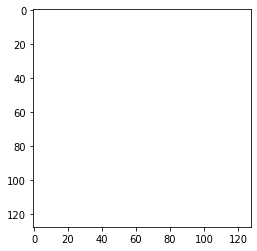

In [22]:
input_frames = load_scenario(DATA_LENGTH)

# https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot
plt.rcParams["animation.html"] = "jshtml"
fig = plt.figure()

ims = []
for i in range(1, 90):
    im = plt.imshow(input_frames[0][i], animated=True)
    ims.append([im])
    sys.stdout.write("\rLoading Frame: " + str(i+1) + "/90")
    sys.stdout.flush()
print("\nAssembling Animation")
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
ani

## Prediktion für 100 ms
Aufgrund der limitiert verfügbaren GPU Leistung wurde bisher nur ein Modell für die Vorhersage des nächsten Zeitschritts (also 100 ms) trainiert. Dieses liefert bereits in einigen Szenarien vielversprechende Ergebnisse. 

### Merkmale des Modells
* LSTM mit 10 vergangenen Zeitschritten als Eingang
* Custom Loss Funktion die es ermöglicht den Fokus der Prediktion auf den Bereich der Objekte zu legen
* Ausgabe des 11ten Bildes

Beispiele hierfür können im ***inference*** notebook betrachtet werden.